# Succesful Movie Characteristics

candidate no. 200816

This report will be about exploring the common components of successful movies. This should allow us to produce a movie that will be successful.

First, I load in the IMDB movie data.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# load the data
file = 'movie_metadata.csv'
df = pd.read_csv(file)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


The goal of our movie is to gross as much as possible. So, when I explore the data, this will be the key indicator of a movie's success. While the IMDB score might be a more accurate representation of how good a movie is, this does not directly project how much money it will make. True, we would like to make a good movie, but our primary concern as a business is to make sure we get a return on the money we put in.

We also have a constraint: budget. We have a budget of 1.5 million, so we should filter the movies that have managed to be successful with a budget equal to or less than ours. 

In [2]:
df[df['budget'] <= 1500000].sort_values('gross', ascending=False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,3400.0,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0
4530,Color,John G. Avildsen,141.0,145.0,80.0,794.0,Burgess Meredith,13000.0,117235247.0,Drama|Sport,...,542.0,English,USA,PG,960000.0,1976.0,1000.0,8.1,1.33,0
4674,Color,George Lucas,100.0,112.0,0.0,425.0,Ron Howard,11000.0,115000000.0,Comedy|Drama|Music,...,238.0,English,USA,PG,777000.0,1973.0,2000.0,7.5,2.35,0
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,1189.0,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000
4485,Color,James Wan,287.0,103.0,0.0,651.0,Monica Potter,2000.0,55153403.0,Horror|Mystery|Thriller,...,1509.0,English,USA,R,1200000.0,2004.0,878.0,7.7,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,Color,Jason Trost,42.0,78.0,91.0,86.0,Jason Trost,407.0,NaN,Sci-Fi|Thriller,...,35.0,English,USA,Unrated,20000.0,2011.0,91.0,4.0,2.35,835
5028,Black and White,Ivan Kavanagh,12.0,83.0,18.0,0.0,Michael Parle,10.0,NaN,Horror,...,1.0,English,Ireland,NaN,10000.0,2007.0,5.0,6.7,1.33,105
5031,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,NaN,Comedy|Horror|Thriller,...,8.0,English,USA,NaN,200000.0,2012.0,98.0,5.4,16.00,424
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4


We can see at the bottom of our output that there are 505 movies that have been made with a budget equal to or less than ours. Our primary objective is to make a good return on the movie, while our secondary goal would be at least to make our money back. Hence, I will filter the movies by whether they grossed more than or equal to their budgets.

In [3]:
df = df[df['budget'] <= 1500000][df['gross'] >= 1500000]
df.sort_values('gross', ascending=False)

/tmp/ipykernel_6273/1479204894.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] <= 1500000][df['gross'] >= 1500000]


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,3400.0,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0
4530,Color,John G. Avildsen,141.0,145.0,80.0,794.0,Burgess Meredith,13000.0,117235247.0,Drama|Sport,...,542.0,English,USA,PG,960000.0,1976.0,1000.0,8.1,1.33,0
4674,Color,George Lucas,100.0,112.0,0.0,425.0,Ron Howard,11000.0,115000000.0,Comedy|Drama|Music,...,238.0,English,USA,PG,777000.0,1973.0,2000.0,7.5,2.35,0
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,1189.0,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000
4485,Color,James Wan,287.0,103.0,0.0,651.0,Monica Potter,2000.0,55153403.0,Horror|Mystery|Thriller,...,1509.0,English,USA,R,1200000.0,2004.0,878.0,7.7,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Color,Richard Glatzer,69.0,90.0,25.0,138.0,Jesse Garcia,231.0,1689999.0,Drama,...,48.0,Spanish,USA,R,400000.0,2006.0,200.0,7.1,2.35,426
4566,Color,Chris Paine,87.0,92.0,2.0,5.0,Phyllis Diller,783.0,1677838.0,Documentary,...,155.0,English,USA,PG,1000000.0,2006.0,659.0,7.7,1.75,0
4829,Color,Cédric Klapisch,29.0,91.0,82.0,8.0,Zinedine Soualem,75.0,1652472.0,Comedy|Romance,...,25.0,French,France,R,300000.0,1996.0,9.0,6.9,1.66,166
4461,Color,Thomas Vinterberg,98.0,105.0,346.0,141.0,Paprika Steen,280.0,1647780.0,Drama,...,258.0,Danish,Denmark,R,1300000.0,1998.0,278.0,8.1,1.33,5000


Great, we have 107 movies that have at least made their money back. We can even see that the highest grossing movie returned over 140 million!

Now that we have sorted our movies to meet our constraints, we can start exploring the data more freely. I would expect genre to play a part in how much a movie grosses. The reason for this is that people will often go to see a movie because it is the "type of movie they like". You might not think much of romantic movies, but you might like anything with a bit of action. I will sort our data such that for each category of genre(s), I will display its average budget and net gross.

Before I implement what I have said above, I would like to explain why I am not more focused on IMDB score. The main reason is that I think IMDB score has a near-linear relationship with net gross, and it is possible that we make a "good movie" that does not make a good enough return on our budget. This would be unsustainable in the long run as we might run out of money in our pursuit to make the perfect movie.

In [4]:
top_genres = df.groupby('genres')['budget','gross'].mean()
top_genres = top_genres.sort_values('gross', ascending=False)
top_genres

/tmp/ipykernel_6273/1969573494.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_genres = df.groupby('genres')['budget','gross'].mean()


,budget,gross
genres,,
Horror,5.187500e+05,7.991961e+07
Comedy|Drama|Music,8.385000e+05,6.200000e+07
Fantasy|Horror|Mystery|Thriller,1.500000e+06,5.399114e+07
Drama|Sport,7.533333e+05,4.342329e+07
Adventure|Family|Romance,5.000000e+05,3.955260e+07
Horror|Thriller,1.945107e+05,3.757930e+07
Horror|Mystery|Thriller,1.064237e+06,3.444768e+07
Adventure|Biography|Drama|Horror|Thriller,5.000000e+05,3.050088e+07
Fantasy|Horror,1.000000e+06,1.910668e+07


We have a variety of genres to choose from. All these genres made a profit relative to their budgets. However, those top two genre categories have a much better absolute difference than the rest. So, if we wanted to be extra picky, we might try to create a movie based on any of the following genres: Horror, Comedy, Drama, Music, Fantasy, Mystery, or Thriller.

### Director Facebook Likes

I would imagine that more popular directors tend to make higher grossing movies on average. To test this, I will use Facebook likes as a proxy for popularity. let us have a look at a plot of the correlation.

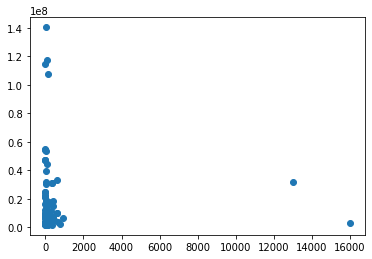

In [5]:
plt.scatter(df['director_facebook_likes'], df['gross'])
plt.show()

Ah, I was wrong! There is not a strong correlation between the directors' Facebook likes and net gross. Possible reasons for this are that Facebook likes is a poor proxy of popularity, or that popularity is not a good indicator of how much money a movie will make.

### Content Rating

I hypothesise that a higher content rating would return a higher grossing. My reasoning is that those old enough to watch R rated movies can take themselves to watch movies, as opposed to kids who have to go with someone else.

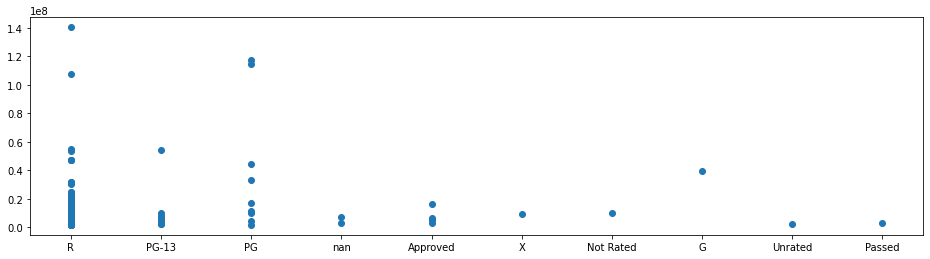

In [6]:
plt.figure(figsize=(16,4))
plt.scatter(df['content_rating'].astype(str), df['gross'])
plt.show()

In this case, there is inconclusive evidence that R rated movies are more profitable than PG movies. There is large variance among the PG category, as well as a couple of outliers in the R category, so we would need more data to be sure.

### Language

I imagine that English spoken movies gross more than other languages because it is the most spoken language in the world. Making an English movie should therefore appeal to a wider audience, and gross more.

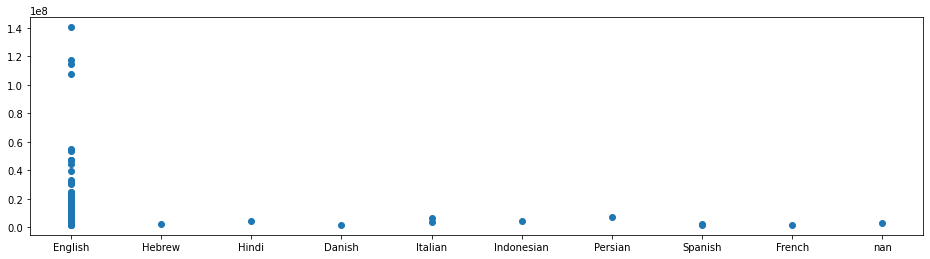

In [7]:
plt.figure(figsize=(16,4))
plt.scatter(df['language'].astype(str), df['gross'])

It is clear to see that English language movies are more profitable than other language movies when the average of the profit from all other languages is taken. Despite this, there are only a tiny amount of data points for the other languages, so we would need more data to be sure. 

### UK vs USA

I will conduct a t-test of UK and USA produced movies. I want to find out if there is a significant difference in how much a movie makes in the USA compared to the UK.

In [8]:
from scipy import stats
country_means = df.groupby('country')['gross'].mean()
country_std = df.groupby('country')['gross'].std()
country_count = df.groupby('country')['gross'].count()

error = (((country_std['USA']**2)/country_count['USA'])+((country_std['UK']**2)/country_count['UK']))**0.5   
z = (country_means['USA'] - country_means['UK'])/error

p_value = (1 - stats.norm.cdf(z))
print ('one tail UK-USA difference: ', p_value)

one tail UK-USA difference:  0.03412413608980902


We have a p-value of < 5% suggesting that there is significant evidence to reject the null hypothesis. The null hypothesis in this case is: UK and USA produced movies gross the same amount. We therefore accept the alternative hypothesis which is: USA produced movies gross more than UK produced movies. 

# Summary

In this report, I have explored the IMDB movie dataset to uncover what makes a successful movie. 

I filtered the data so that only movies fitting our constraints (budget and break-even necessity) were shown. 

I explored which genres of movies were the most profitable.

I analysed whether the Facebook likes of the director had an impact on profitability. I also looked at whether the content rating and language had an impact on profit.

I conducted a t-test on whether USA produced movies gross more than UK produced movies.

Many genres were profitable. However, I would suggest making a horror movie, since the net gain from 
gross - budget was the highest. I would also suggest producing the movie in English, since it can be appreciated in many different countries. We could also add native subtitles and dubs for these countries if they would rather watch the movie in their own languages. Also, we may be constrained the to make our movie in the UK, however, I would suggest producing the movie in the USA if possible

More data is always a good starting point for what to do better next time. This is especially true in our case, since the filtered dataset only produced 100 data samples. Low data sample numbers means our conclusions vary more, since we might have stumbled on outliers, and fixated too much on these.